In [2]:
import pandas as pd 
import numpy as np
import os 
import glob as glob
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [345]:
paths = ['results/NfIX/exp0/N16384/*.csv','results/Mfix/exp3_simple/M125/*.csv']
paths = ['results/Mfix/exp5_simple/M125/avg_metrics.csv']
df_all = []


for path in paths:
    ress = glob.glob(path)
    ress = sorted(ress)
    span = []
    sample = []
    times = []
    bns = []

    for nrs, res in enumerate(ress):
        filename = os.path.basename(res).split('_')[1]
        kindexp = os.path.basename(res).split('_')[2][:-4]
        df0 = pd.read_csv(res)
        df_all.append(df0)
        if nrs%1==0:
            bridge = filename[:]
            # bridge = 'Loiola'
            # print(bridge)
            df_all = pd.concat(df_all).reset_index(drop=True)
            df_all['time_diff'] = df_all['time_spbn'] - df_all['time_fbn']
        
            if 'instances' in df_all.columns:
                df = df_all.groupby('instances').mean().reset_index()
                fixed = 'instances'
            else:
                df = df_all.groupby('grid').mean().reset_index()
                fixed = 'grid'
            df_all = []
                
            for idx, row in df.iterrows():
                N = int(row[fixed])

                if N in [1024,2048,4096, 8192, 16384, 32768] or N in [25,50,75,100,125,150,175,200]:
                    fbnval = row['time_fbn']
                    spbnval = row['time_spbn']
                    
                    key_SAMP = f'{filename[:]}'
                    # key_SAMP = 'Loiola'
                    
                    span += [filename]*1
                    bns += [f' {N}_SPBN/FSBN'] #[f'{N}_FSBN', f'{N}_SPBN']
                    # bns += [f'{N}_FSBN', f'{N}_SPBN']
                    sample += [key_SAMP]*1
                    times += [spbnval/fbnval]
                    # times += [fbnval, spbnval]
    

    cdd_df = pd.DataFrame({'network':bns , 'dataset_name':sample, 'metric': times})
    cdd_df.to_csv(f'results/cdd_df_{kindexp}.csv', index=False)
    # print(cdd_df)
# label_encoder = LabelEncoder()

# cdd_df['dataset_name_encoded'] = label_encoder.fit_transform(cdd_df['dataset_name'])
# # cdd_df['span_encoded'] = label_encoder.fit_transform(cdd_df['span'])
# cdd_df['network_encoded'] = label_encoder.fit_transform(cdd_df['network'])

# dataset_mapping = dict(zip(cdd_df['dataset_name_encoded'], cdd_df['dataset_name']))
# # span_mapping = dict(zip(cdd_df['span_encoded'], cdd_df['span']))
# network_mapping = dict(zip(cdd_df['network_encoded'], cdd_df['network']))

# cdd_df_encoded = cdd_df[['network_encoded', 'dataset_name_encoded', 'metric']]
# networks = np.unique(cdd_df_encoded['network_encoded'])

# cdd_df_span_grouped = []
# for net in networks:
#     cdd_df_nets = cdd_df_encoded[cdd_df_encoded['network_encoded'] == net]
#     # print(cdd_df_nets)

#     mean_experiments = cdd_df_nets.groupby('dataset_name_encoded').mean().reset_index()
#     # mean_spans = mean_experiments.groupby('network_encoded').mean().drop(columns=['span_encoded']).reset_index()
#     print(mean_experiments)

#     cdd_df_span_grouped.append(mean_experiments)

# cdd_df_span_grouped = pd.concat(cdd_df_span_grouped)
# cdd_df_span_grouped['dataset_name'] = cdd_df_span_grouped['dataset_name_encoded'].replace(dataset_mapping)
# cdd_df_span_grouped['network'] = cdd_df_span_grouped['network_encoded'].replace(network_mapping)
# # cdd_df_span_grouped['span'] = cdd_df_span_grouped['span_encoded'].replace(span_mapping)
# cdd_df_span_grouped = cdd_df_span_grouped.drop(columns=['dataset_name_encoded', 'network_encoded'])[['network', 'dataset_name', 'metric']]
# cdd_df_span_grouped.columns = ['network', 'dataset_name', 'metric']
    for n, group in cdd_df.groupby('dataset_name'):
        print(group.head(20))



          network dataset_name     metric
0    25_SPBN/FSBN         e1v1  11.023183
1    50_SPBN/FSBN         e1v1   2.974682
2    75_SPBN/FSBN         e1v1   3.909643
3   100_SPBN/FSBN         e1v1   3.263796
4   125_SPBN/FSBN         e1v1   3.005560
5   150_SPBN/FSBN         e1v1   2.818661
6   175_SPBN/FSBN         e1v1   2.473691
7   200_SPBN/FSBN         e1v1   2.167563
           network dataset_name     metric
8     25_SPBN/FSBN         e1v2  13.446422
9     50_SPBN/FSBN         e1v2   4.850531
10    75_SPBN/FSBN         e1v2   3.491140
11   100_SPBN/FSBN         e1v2   3.021443
12   125_SPBN/FSBN         e1v2   2.858778
13   150_SPBN/FSBN         e1v2   2.369091
14   175_SPBN/FSBN         e1v2   2.252801
15   200_SPBN/FSBN         e1v2   2.077243
           network dataset_name    metric
16    25_SPBN/FSBN         e1v3  5.842652
17    50_SPBN/FSBN         e1v3  5.233589
18    75_SPBN/FSBN         e1v3  3.462808
19   100_SPBN/FSBN         e1v3  3.136186
20   125_SPBN/FSBN       

#### Avg metrics from JSON

In [59]:
paths = ['results/Mfix/exp7_simple/M125/avg_metrics.csv']
df_all = []

for path in paths:
    sample = []
    times = []
    bns = []

    df= pd.read_csv(path)
    # print(df_all)
    if 'instances' in df.columns:
        fixed = 'instances'
    else:
        fixed = 'grid'
    
    df_all = []
    for idx, row in df.iterrows():
        N = int(row[fixed])

        if N in [1024, 4096, 32768] or N in [25,50,75,100,125,150,175,200]:
            fbnval = row['fbn_slogl']
            spbnval = row['spbn_slogl']
            span_name = row['span']
            
            # key_SAMP = f'{filename[:]}'
            # key_SAMP = 'Loiola'
            
            # bns += [f' {N}_SPBN/FSBN'] #[f'{N}_FSBN', f'{N}_SPBN']
            bns += [f'{N}_FSBN', f'{N}_SPBN']
            sample += [span_name]*2
            # times += [spbnval/fbnval]
            times += [fbnval, spbnval]
    

    cdd_df = pd.DataFrame({'network':bns , 'dataset_name':sample, 'metric': times})
    cdd_df.to_csv(f'results/Mfix/exp7_simple/M125/cdd_df_slogl.csv', index=False)
for n, group in cdd_df.groupby('dataset_name'):
        print(group.head(20))

       network dataset_name        metric
0    1024_FSBN         e1v1 -37298.657945
1    1024_SPBN         e1v1 -37294.870423
12   4096_FSBN         e1v1 -36360.253005
13   4096_SPBN         e1v1 -36340.611008
24  32768_FSBN         e1v1 -35233.188915
25  32768_SPBN         e1v1 -35121.315305
       network dataset_name        metric
2    1024_FSBN         e1v2 -36348.400818
3    1024_SPBN         e1v2 -36322.987841
14   4096_FSBN         e1v2 -35034.297788
15   4096_SPBN         e1v2 -34990.359310
26  32768_FSBN         e1v2 -33585.486946
27  32768_SPBN         e1v2 -33502.645009
       network dataset_name        metric
4    1024_FSBN         e1v3 -35799.733090
5    1024_SPBN         e1v3 -35782.634041
16   4096_FSBN         e1v3 -34811.475047
17   4096_SPBN         e1v3 -34759.346864
28  32768_FSBN         e1v3 -33539.748665
29  32768_SPBN         e1v3 -33423.254934
       network dataset_name        metric
6    1024_FSBN         e2v1 -34686.513659
7    1024_SPBN         e2v1 -34675

In [60]:
transformed_df = cdd_df.pivot(index='dataset_name', columns='network', values='metric')
transformed_df.to_csv('results/Mfix/exp7_simple/M125/cdd_df_slogl_matrixlike.csv', index=True)
transformed_df

network,1024_FSBN,1024_SPBN,32768_FSBN,32768_SPBN,4096_FSBN,4096_SPBN
dataset_name,,,,,,
e1v1,-37298.657945,-37294.870423,-35233.188915,-35121.315305,-36360.253005,-36340.611008
e1v2,-36348.400818,-36322.987841,-33585.486946,-33502.645009,-35034.297788,-34990.359310
e1v3,-35799.733090,-35782.634041,-33539.748665,-33423.254934,-34811.475047,-34759.346864
e2v1,-34686.513659,-34675.303137,-32349.698027,-32236.506115,-33634.036736,-33591.555658
e2v2,-36639.414486,-36601.551548,-34073.583702,-33950.073037,-35419.514441,-35365.191736
e2v3,-36212.851918,-36194.196336,-34043.014668,-33956.244165,-35238.664599,-35203.755583


#### Nemenyi posthoc with Friedman 0.05

/tmp/ipykernel_1153/1977678095.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/rsojo/anaconda3/envs/pybnesianFT/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/rsojo/anaconda3/envs/pybnesianFT/lib/python3.9/site-packages/scikit_posthocs/_plotting.py:546: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(rank, 0, **{"color": curr_color, **marker_props})


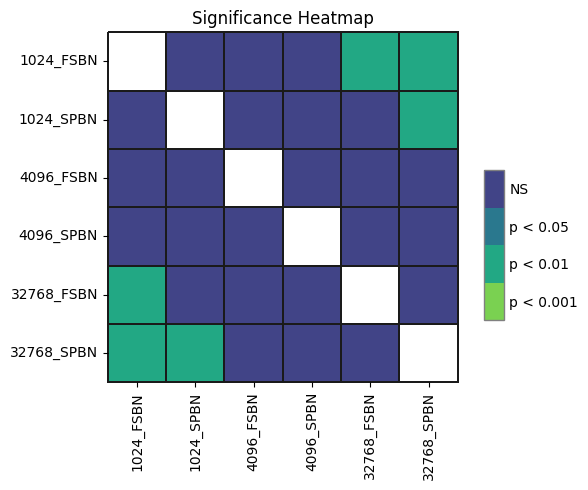

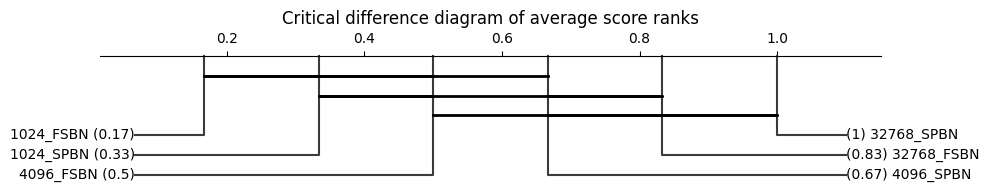

In [61]:
import scikit_posthocs as sp

cdd_pth = ['results/Mfix/exp7_simple/M125/cdd_df_slogl.csv','results/cdd_df_Mfixed.csv', 'results/cdd_df_Nfixed.csv']
df_perf = pd.read_csv(cdd_pth[0], index_col=False)
names = df_perf['network'].unique()
cd = sp.posthoc_nemenyi_friedman(df_perf, y_col='metric', block_col='dataset_name', group_col='network', melted=True) 
#Nemenyi posthoc test

plt.figure(figsize=(5, 5))
plt.title('Significance Heatmap')

# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#414487ff', '#7ad151ff' , '#22a884ff','#2a788eff' ]
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.1', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [1, 0.35, 0.04, 0.3], 'cmap': cmap}
sp.sign_plot(cd, **heatmap_args)
plt.tight_layout()
plt.savefig('results/sh_Mfixed_slogl.png')

avg_rank0 = df_perf.groupby('dataset_name').metric.rank(pct=True).groupby(df_perf.network).mean()
plt.figure(figsize=(10, 2), dpi=100)
plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank0, cd,
                               text_h_margin=0.1,
                               label_props={'color': 'black', 'fontweight': None},
                                crossbar_props={'color': 'black', 'marker': None},
                                marker_props={'marker': '', 's': 50, 'color': 'k', 'edgecolor': 'k'},
                                elbow_props={'color': '#3a3b3c'},)
plt.tight_layout()
plt.savefig('results/cdd_Mfixed_slogl.png')


#### Bergmann Hommens posthoc with Friedman 0.05

In [63]:
bergmann_psthoc = pd.read_csv('results/Mfix/exp7_simple/M125/bergmann_hommel_posthoc.csv', index_col = 0)
bergmann_psthoc.fillna(1, inplace=True)
bergmann_psthoc.columns = ['1k_FSBN','1k_SPBN','4k_FSBN','4k_SPBN','32k_FSBN','32k_SPBN']
bergmann_psthoc.index = ['1k_FSBN','1k_SPBN','4k_FSBN','4k_SPBN','32k_FSBN','32k_SPBN']
bergmann_psthoc

,1k_FSBN,1k_SPBN,4k_FSBN,4k_SPBN,32k_FSBN,32k_SPBN
1k_FSBN,1.000000,1.000000,0.384465,0.038350,0.002128,0.000055
1k_SPBN,1.000000,1.000000,1.000000,0.384465,0.038350,0.002128
4k_FSBN,0.384465,1.000000,1.000000,1.000000,0.384465,0.038350
4k_SPBN,0.038350,0.384465,1.000000,1.000000,1.000000,0.384465
32k_FSBN,0.002128,0.038350,0.384465,1.000000,1.000000,1.000000
32k_SPBN,0.000055,0.002128,0.038350,0.384465,1.000000,1.000000


In [64]:
avg_rank_percentile = avg_rank0.sort_values()
avg_rank_percentile.index = bergmann_psthoc.index
avg_rank_percentile

1k_FSBN     0.166667
1k_SPBN     0.333333
4k_FSBN     0.500000
4k_SPBN     0.666667
32k_FSBN    0.833333
32k_SPBN    1.000000
Name: metric, dtype: float64

In [65]:
avg_rank = pd.read_csv('results/Mfix/exp7_simple/M125/avg_ranking_posthoc.csv',index_col = 0)
avg_rank.sort_values(by='average.ranking', inplace=True)
avg_rank

,average.ranking
X32768_SPBN,1
X32768_FSBN,2
X4096_SPBN,3
X4096_FSBN,4
X1024_SPBN,5
X1024_FSBN,6


/tmp/ipykernel_1153/2764387946.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/rsojo/anaconda3/envs/pybnesianFT/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/rsojo/anaconda3/envs/pybnesianFT/lib/python3.9/site-packages/scikit_posthocs/_plotting.py:546: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(rank, 0, **{"color": curr_color, **marker_props})


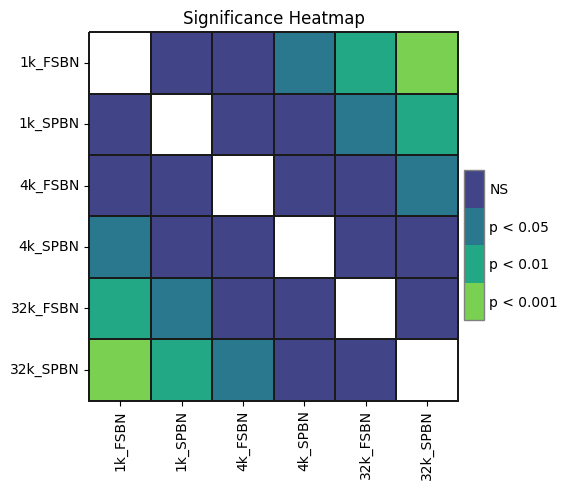

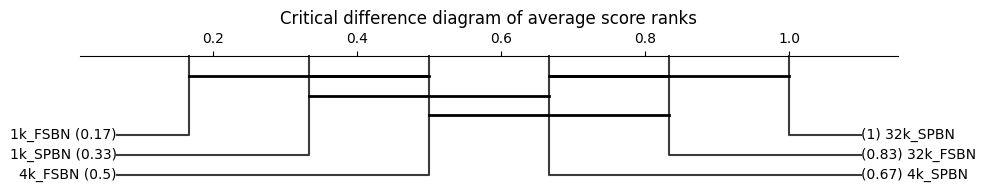

In [66]:

plt.figure(figsize=(5, 5))
plt.title('Significance Heatmap')

# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#414487ff', '#7ad151ff' , '#22a884ff','#2a788eff' ]
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.1', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.96, 0.35, 0.04, 0.3], 'cmap': cmap}
sp.sign_plot(bergmann_psthoc, **heatmap_args)
plt.tight_layout()
plt.savefig('results/Mfix/exp7_simple/M125/significanceHM_Mfixed_slogl_bergmann_ph2.pdf',format='pdf', bbox_inches="tight")

plt.figure(figsize=(10, 2), dpi=100)
plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank_percentile, 
                               bergmann_psthoc,
                               text_h_margin=0.1,
                               label_props={'color': 'black', 'fontweight': None},
                                crossbar_props={'color': 'black', 'marker': None},
                                marker_props={'marker': '', 's': 50, 'color': 'k', 'edgecolor': 'k'},
                                elbow_props={'color': '#3a3b3c'},)
plt.tight_layout()
plt.savefig('results/Mfix/exp7_simple/M125/CDD_Mfixed_slogl_bergmann_ph2.pdf',format='pdf', bbox_inches="tight")

#### Avg metrics from JSON

In [57]:
paths = ['results/Nfix/exp7_simple/N16384/avg_metrics.csv']
df_all = []

for path in paths:
    sample = []
    times = []
    bns = []

    df= pd.read_csv(path)
    # print(df_all)
    if 'instances' in df.columns:
        fixed = 'instances'
    else:
        fixed = 'grid'
    
    df_all = []
    for idx, row in df.iterrows():
        N = int(row[fixed])

        if N in [1024, 4096, 32768] or N in [25,125,200]:
            fbnval = row['fbn_slogl']
            spbnval = row['spbn_slogl']
            span_name = row['span']
            
            # key_SAMP = f'{filename[:]}'
            # key_SAMP = 'Loiola'
            
            # bns += [f' {N}_SPBN/FSBN'] #[f'{N}_FSBN', f'{N}_SPBN']
            bns += [f'{N}_FSBN', f'{N}_SPBN']
            sample += [span_name]*2
            # times += [spbnval/fbnval]
            times += [fbnval, spbnval]
    

    cdd_df = pd.DataFrame({'network':bns , 'dataset_name':sample, 'metric': times})
    cdd_df.to_csv(f'results/Nfix/exp7_simple/N16384/cdd_df_slogl.csv', index=False)
for n, group in cdd_df.groupby('dataset_name'):
        print(group.head(20))

     network dataset_name        metric
0    25_FSBN         e1v1 -35977.662791
1    25_SPBN         e1v1 -35442.016496
12  125_FSBN         e1v1 -35565.301236
13  125_SPBN         e1v1 -35463.175466
24  200_FSBN         e1v1 -35524.957454
25  200_SPBN         e1v1 -35455.507872
     network dataset_name        metric
2    25_FSBN         e1v2 -34366.413752
3    25_SPBN         e1v2 -33857.842872
14  125_FSBN         e1v2 -33914.095195
15  125_SPBN         e1v2 -33848.196704
26  200_FSBN         e1v2 -33959.925180
27  200_SPBN         e1v2 -33913.150264
     network dataset_name        metric
4    25_FSBN         e1v3 -34299.486241
5    25_SPBN         e1v3 -33857.184445
16  125_FSBN         e1v3 -33909.446905
17  125_SPBN         e1v3 -33819.143979
28  200_FSBN         e1v3 -33829.388875
29  200_SPBN         e1v3 -33763.335953
     network dataset_name        metric
6    25_FSBN         e2v1 -33165.932119
7    25_SPBN         e2v1 -32597.652417
18  125_FSBN         e2v1 -32696.713110


In [58]:
transformed_df = cdd_df.pivot(index='dataset_name', columns='network', values='metric')
transformed_df.to_csv('results/Nfix/exp7_simple/N16384/cdd_df_slogl_matrixlike.csv', index=True)
transformed_df

network,125_FSBN,125_SPBN,200_FSBN,200_SPBN,25_FSBN,25_SPBN
dataset_name,,,,,,
e1v1,-35565.301236,-35463.175466,-35524.957454,-35455.507872,-35977.662791,-35442.016496
e1v2,-33914.095195,-33848.196704,-33959.925180,-33913.150264,-34366.413752,-33857.842872
e1v3,-33909.446905,-33819.143979,-33829.388875,-33763.335953,-34299.486241,-33857.184445
e2v1,-32696.713110,-32593.378760,-32649.831916,-32607.907052,-33165.932119,-32597.652417
e2v2,-34477.565281,-34380.100376,-34485.236121,-34391.448860,-35053.222776,-34377.690494
e2v3,-34413.232235,-34339.486384,-34418.335759,-34390.440913,-35141.851604,-34388.601623


#### Nemenyi posthoc with Friedman 0.05

/tmp/ipykernel_6293/3570489688.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/rsojo/anaconda3/envs/pybnesianFT/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/rsojo/anaconda3/envs/pybnesianFT/lib/python3.9/site-packages/scikit_posthocs/_plotting.py:546: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(rank, 0, **{"color": curr_color, **marker_props})


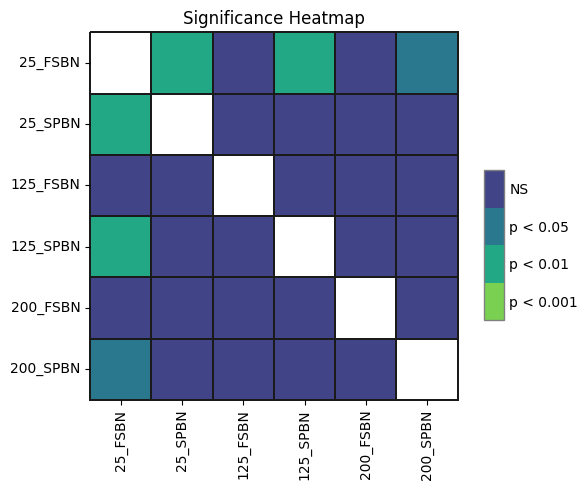

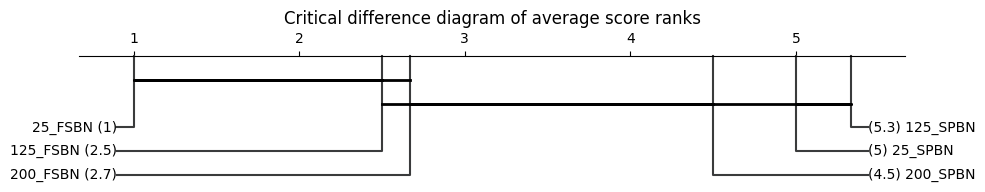

In [59]:
import scikit_posthocs as sp

cdd_pth = ['results/Nfix/exp7_simple/N16384/cdd_df_slogl.csv','results/cdd_df_Mfixed.csv', 'results/cdd_df_Nfixed.csv']
df_perf = pd.read_csv(cdd_pth[0], index_col=False)
names = df_perf['network'].unique()
cd = sp.posthoc_nemenyi_friedman(df_perf, y_col='metric', block_col='dataset_name', group_col='network', melted=True) 
#Nemenyi posthoc test

plt.figure(figsize=(5, 5))
plt.title('Significance Heatmap')

# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#414487ff', '#7ad151ff' , '#22a884ff','#2a788eff' ]
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.1', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [1, 0.35, 0.04, 0.3], 'cmap': cmap}
sp.sign_plot(cd, **heatmap_args)
plt.tight_layout()
plt.savefig('results/sh_Mfixed_slogl.png')

avg_rank0 = df_perf.groupby('dataset_name').metric.rank(pct=False).groupby(df_perf.network).mean()
plt.figure(figsize=(10, 2), dpi=100)
plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank0, cd,
                               text_h_margin=0.1,
                               label_props={'color': 'black', 'fontweight': None},
                                crossbar_props={'color': 'black', 'marker': None},
                                marker_props={'marker': '', 's': 50, 'color': 'k', 'edgecolor': 'k'},
                                elbow_props={'color': '#3a3b3c'},)
plt.tight_layout()
plt.savefig('results/cdd_Mfixed_slogl.png')


#### Bergmann Hommens posthoc with Friedman 0.05

In [60]:
bergmann_psthoc = pd.read_csv('results/Nfix/exp7_simple/N16384/bergmann_hommel_posthoc.csv', index_col = 0)
bergmann_psthoc.fillna(1, inplace=True)
print(bergmann_psthoc)
bergmann_psthoc.columns = ['25_FSBN','25_SPBN','125_FSBN','125_SPBN','200_FSBN','200_SPBN']
bergmann_psthoc.index = ['25_FSBN','25_SPBN','125_FSBN','125_SPBN','200_FSBN','200_SPBN']
bergmann_psthoc

           X25_FSBN  X25_SPBN  X125_FSBN  X125_SPBN  X200_FSBN  X200_SPBN
X25_FSBN   1.000000  0.002128   0.736936   0.000904   0.736936   0.008356
X25_SPBN   0.002128  1.000000   0.123825   1.000000   0.123825   1.000000
X125_FSBN  0.736936  0.123825   1.000000   0.087119   1.000000   0.256310
X125_SPBN  0.000904  1.000000   0.087119   1.000000   0.094883   1.000000
X200_FSBN  0.736936  0.123825   1.000000   0.094883   1.000000   0.268899
X200_SPBN  0.008356  1.000000   0.256310   1.000000   0.268899   1.000000


,25_FSBN,25_SPBN,125_FSBN,125_SPBN,200_FSBN,200_SPBN
25_FSBN,1.000000,0.002128,0.736936,0.000904,0.736936,0.008356
25_SPBN,0.002128,1.000000,0.123825,1.000000,0.123825,1.000000
125_FSBN,0.736936,0.123825,1.000000,0.087119,1.000000,0.256310
125_SPBN,0.000904,1.000000,0.087119,1.000000,0.094883,1.000000
200_FSBN,0.736936,0.123825,1.000000,0.094883,1.000000,0.268899
200_SPBN,0.008356,1.000000,0.256310,1.000000,0.268899,1.000000


In [61]:
avg_rank_percentile = avg_rank0.sort_values()
avg_rank_percentile.index = bergmann_psthoc.index
type(round(avg_rank_percentile/6,2))

pandas.core.series.Series

In [62]:
avg_rank = pd.read_csv('results/Nfix/exp7_simple/N16384/avg_ranking_posthoc.csv',index_col = 0)
avg_rank.sort_values(by='average.ranking', inplace=True)
avg_rank_pct = round(avg_rank/6,2)
avg_rank_pct.index = [idx[1:] for idx in avg_rank.index]
avg_rank_pct = avg_rank_pct['average.ranking']
avg_rank_pct

25_FSBN     0.17
125_FSBN    0.42
200_FSBN    0.44
200_SPBN    0.75
25_SPBN     0.83
125_SPBN    0.89
Name: average.ranking, dtype: float64

/tmp/ipykernel_6293/2570557289.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/rsojo/anaconda3/envs/pybnesianFT/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/rsojo/anaconda3/envs/pybnesianFT/lib/python3.9/site-packages/scikit_posthocs/_plotting.py:546: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(rank, 0, **{"color": curr_color, **marker_props})


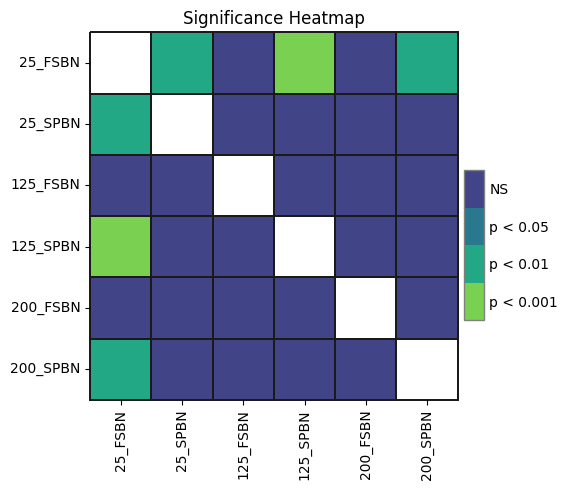

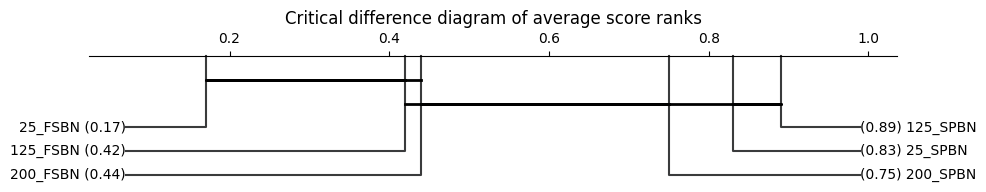

In [63]:

plt.figure(figsize=(5, 5))
plt.title('Significance Heatmap')

# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#414487ff', '#7ad151ff' , '#22a884ff','#2a788eff' ]
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.1', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.96, 0.35, 0.04, 0.3], 'cmap': cmap}
sp.sign_plot(bergmann_psthoc, **heatmap_args)
plt.tight_layout()
plt.savefig('results/Nfix/exp7_simple/N16384/significanceHM_Mfixed_slogl_bergmann_ph2.pdf',format='pdf', bbox_inches="tight")

plt.figure(figsize=(10, 2), dpi=100)
plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank_pct, 
                               bergmann_psthoc,
                               text_h_margin=0.1,
                               label_props={'color': 'black', 'fontweight': None},
                                crossbar_props={'color': 'black', 'marker': None},
                                marker_props={'marker': '', 's': 50, 'color': 'k', 'edgecolor': 'k'},
                                elbow_props={'color': '#3a3b3c'},)
plt.tight_layout()
plt.savefig('results/Nfix/exp7_simple/N16384/CDD_Mfixed_slogl_bergmann_ph2.pdf',format='pdf', bbox_inches="tight")